<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/inflation80s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
# Go back a bit farther so YoY changes are defined early in the window
start, end = dt.datetime(1958, 1, 1), dt.datetime(1965, 12, 31)

# --- Fetch series ---
cpi    = web.DataReader("CPIAUCSL", "fred", start, end)  # monthly
unrate = web.DataReader("UNRATE",   "fred", start, end)  # monthly
gdp    = web.DataReader("GDPC1",    "fred", start, end)  # quarterly

# --- Compute YoY measures ---
inflation_m = cpi.pct_change(12) * 100        # monthly YoY inflation
gdp_growth  = gdp.pct_change(4) * 100         # quarterly YoY GDP growth

# --- Build a quarterly PeriodIndex from GDP (this will anchor everything) ---
gdp_q_index = gdp.index.to_period('Q')        # e.g., 1959Q1, 1959Q2, ...
gdp_growth.index = gdp_q_index

# --- Convert monthly series to quarterly using PeriodIndex, then align to GDP quarters ---
inflation_q = (
    inflation_m
    .set_index(inflation_m.index.to_period('Q'))
    .groupby(level=0).mean()
    .reindex(gdp_q_index)                     # align to GDP quarters
)

unrate_q = (
    unrate
    .set_index(unrate.index.to_period('Q'))
    .groupby(level=0).mean()
    .reindex(gdp_q_index)
)

# --- Combine and clean ---
df = pd.concat([inflation_q, unrate_q, gdp_growth], axis=1)
df.columns = ["Inflation (YoY %)", "Unemployment (%)", "GDP growth (YoY %)"]

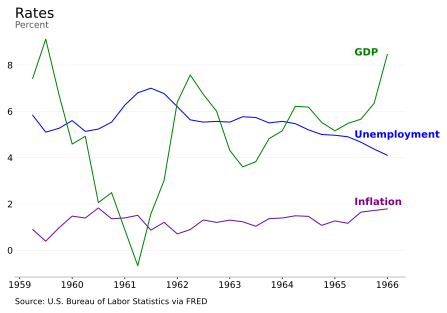

In [23]:
df_plot = df.copy()
df_plot.index = df_plot.index.to_timestamp(how="end")  # -> DatetimeIndex


# --- NYT-style colors ---
line_color     = "#6a0dad"  # deep purple (main line)
fill_color     = "#e6d7f5"  # light lavender fill
forecast_fill  = "#d8bdf0"  # medium lavender for forecast shading
grid_color     = "#f0e6f9"  # very light purple-gray for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(df_plot.index, df_plot['Inflation (YoY %)'], color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")
ax.plot(df_plot.index, df_plot['Unemployment (%)'], color='blue', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df_plot.index, df_plot['GDP growth (YoY %)'], color='green', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Rates', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Labor Statistics via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("GDP",
        xy = (0.87, 0.9),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        color='green',
        weight='bold')

ax.annotate("Unemployment",
        xy = (0.87, 0.57),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        color='blue',
        weight='bold')


ax.annotate("Inflation",
        xy = (0.87, 0.3),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        color='purple',
        weight='bold')

fig.savefig("kennedy_lbj_pre.png", bbox_inches="tight", dpi=300)
plt.show()

In [25]:
# Go back a bit farther so YoY changes are defined early in the window
start, end = dt.datetime(1964, 1, 1), dt.datetime(1970, 12, 31)

# --- Fetch series ---
cpi    = web.DataReader("CPIAUCSL", "fred", start, end)  # monthly
unrate = web.DataReader("UNRATE",   "fred", start, end)  # monthly
gdp    = web.DataReader("GDPC1",    "fred", start, end)  # quarterly

# --- Compute YoY measures ---
inflation_m = cpi.pct_change(12) * 100        # monthly YoY inflation
gdp_growth  = gdp.pct_change(4) * 100         # quarterly YoY GDP growth

# --- Build a quarterly PeriodIndex from GDP (this will anchor everything) ---
gdp_q_index = gdp.index.to_period('Q')        # e.g., 1959Q1, 1959Q2, ...
gdp_growth.index = gdp_q_index

# --- Convert monthly series to quarterly using PeriodIndex, then align to GDP quarters ---
inflation_q = (
    inflation_m
    .set_index(inflation_m.index.to_period('Q'))
    .groupby(level=0).mean()
    .reindex(gdp_q_index)                     # align to GDP quarters
)

unrate_q = (
    unrate
    .set_index(unrate.index.to_period('Q'))
    .groupby(level=0).mean()
    .reindex(gdp_q_index)
)

# --- Combine and clean ---
df = pd.concat([inflation_q, unrate_q, gdp_growth], axis=1)
df.columns = ["Inflation (YoY %)", "Unemployment (%)", "GDP growth (YoY %)"]

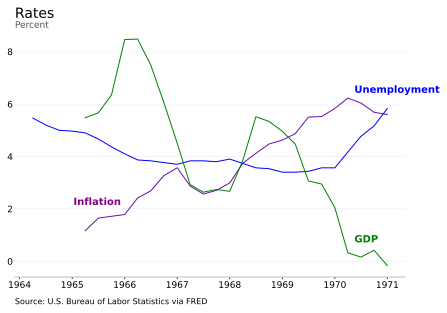

In [31]:
df_plot = df.copy()
df_plot.index = df_plot.index.to_timestamp(how="end")  # -> DatetimeIndex


# --- NYT-style colors ---
line_color     = "#6a0dad"  # deep purple (main line)
fill_color     = "#e6d7f5"  # light lavender fill
forecast_fill  = "#d8bdf0"  # medium lavender for forecast shading
grid_color     = "#f0e6f9"  # very light purple-gray for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(df_plot.index, df_plot['Inflation (YoY %)'], color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")
ax.plot(df_plot.index, df_plot['Unemployment (%)'], color='blue', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

ax.plot(df_plot.index, df_plot['GDP growth (YoY %)'], color='green', linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")
# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Rates', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Labor Statistics via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

ax.annotate("GDP",
        xy = (0.87, 0.15),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        color='green',
        weight='bold')

ax.annotate("Unemployment",
        xy = (0.87, 0.75),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        color='blue',
        weight='bold')


ax.annotate("Inflation",
        xy = (0.15, 0.3),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=10,
        color='purple',
        weight='bold')

fig.savefig("kennedy_lbj_post.png", bbox_inches="tight", dpi=300)
plt.show()